Found 26 image(s).

[1/26] Processing: IMG_0961.JPG
 ✓ Chessboard detected.

[2/26] Processing: IMG_0962.JPG
 ✓ Chessboard detected.

[3/26] Processing: IMG_0963.JPG
 ✓ Chessboard detected.

[4/26] Processing: IMG_0964.JPG
 ✓ Chessboard detected.

[5/26] Processing: IMG_0965.JPG
 ✓ Chessboard detected.

[6/26] Processing: IMG_0966.JPG
 ✓ Chessboard detected.


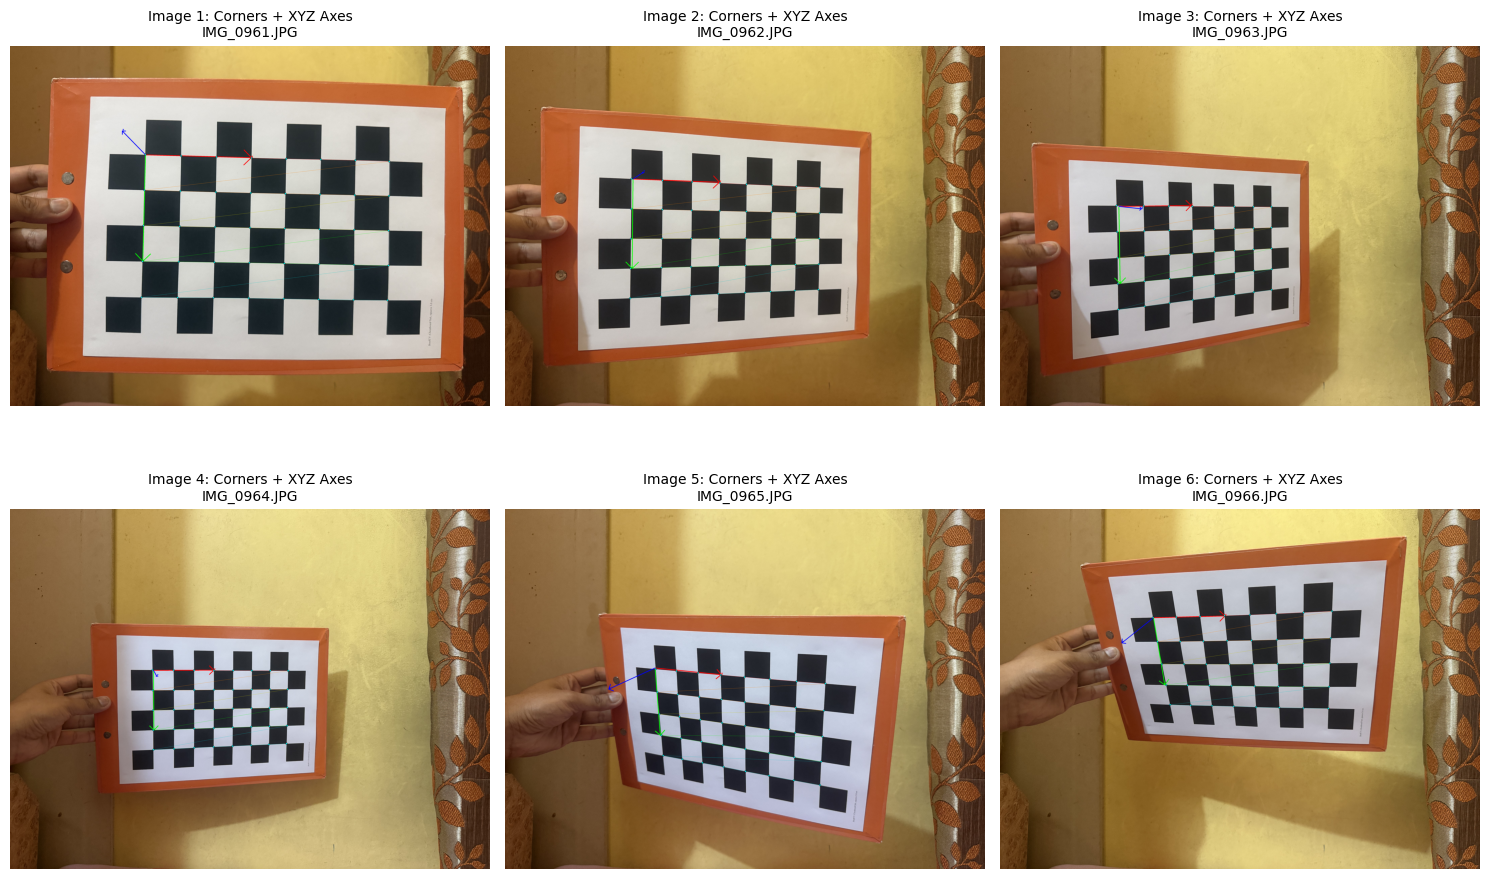


[7/26] Processing: IMG_0967.JPG
 ✗ Chessboard NOT detected.

[8/26] Processing: IMG_0968.JPG
 ✓ Chessboard detected.

[9/26] Processing: IMG_0969.JPG
 ✓ Chessboard detected.

[10/26] Processing: IMG_0970.JPG
 ✓ Chessboard detected.

[11/26] Processing: IMG_0971.JPG
 ✓ Chessboard detected.

[12/26] Processing: IMG_0972.JPG
 ✗ Chessboard NOT detected.

[13/26] Processing: IMG_0973.JPG
 ✓ Chessboard detected.

[14/26] Processing: IMG_0974.JPG
 ✓ Chessboard detected.

[15/26] Processing: IMG_0975.JPG
 ✓ Chessboard detected.

[16/26] Processing: IMG_0976.JPG
 ✓ Chessboard detected.

[17/26] Processing: IMG_0977.JPG
 ✗ Chessboard NOT detected.

[18/26] Processing: IMG_0978.JPG
 ✗ Chessboard NOT detected.

[19/26] Processing: IMG_0979.JPG
 ✓ Chessboard detected.

[20/26] Processing: IMG_0980.JPG
 ✗ Chessboard NOT detected.

[21/26] Processing: IMG_0981.JPG
 ✓ Chessboard detected.

[22/26] Processing: IMG_0982.JPG
 ✓ Chessboard detected.

[23/26] Processing: IMG_0983.JPG
 ✓ Chessboard detecte

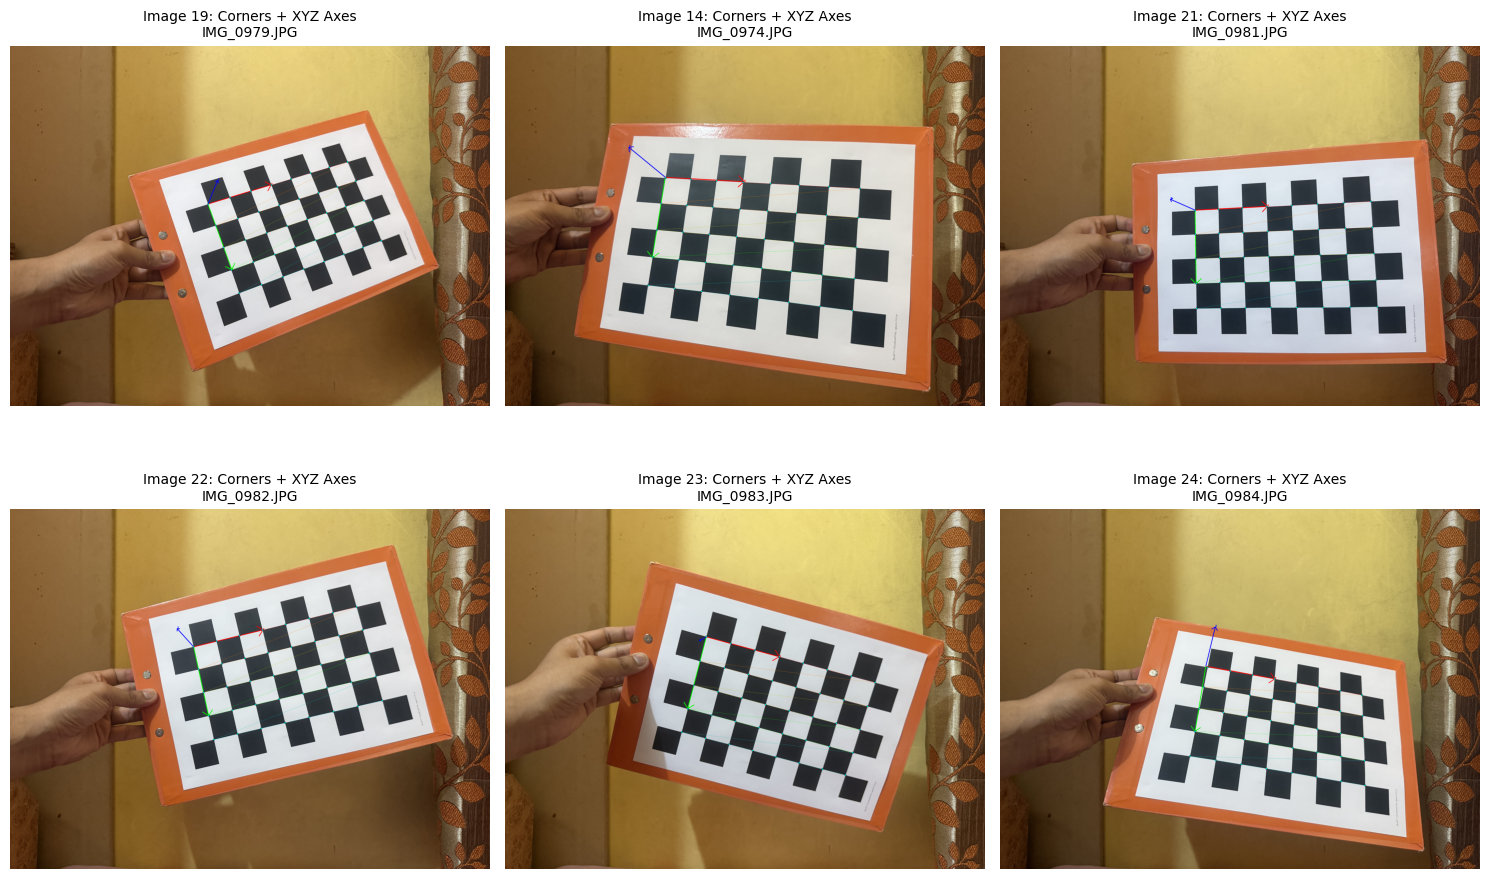


[25/26] Processing: IMG_0985.JPG
 ✓ Chessboard detected.

[26/26] Processing: IMG_0986.JPG
 ✓ Chessboard detected.


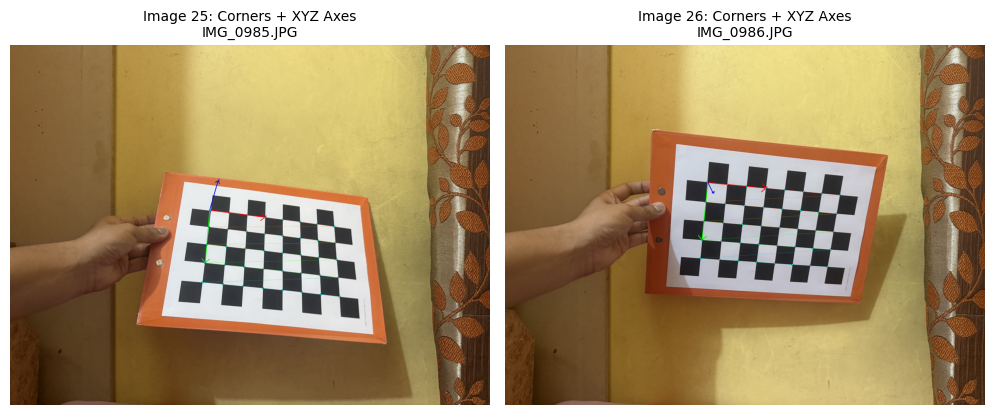


✓ Calibration complete!
Camera Matrix:
 [[3.96468132e+03 0.00000000e+00 2.79612355e+03]
 [0.00000000e+00 3.95918955e+03 2.15585899e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Coefficients:
 [[ 0.12295367 -0.19094559  0.00111336 -0.00547174 -0.65125816]]
Calibration data saved as 'iphone_calibration_data.npz'

Calibration Results:
- Used 21 images for calibration
- Reprojection error: 1.5126 pixels


In [8]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Chessboard parameters
chessboard_size = (8, 5)
square_size = 3.0  # Square 3.0 cm

# Prepare object points
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
objp *= square_size

# Arrays to store object points and image points
objpoints = []
imgpoints = []

# Image loading
image_path = r'C:\Users\vikra\Downloads\Iphone_Images\newdata\*.jpg'
images = glob.glob(image_path)
print(f"Found {len(images)} image(s).")

plt.figure(figsize=(15, 10))

for idx, fname in enumerate(images):
    print(f"\n[{idx + 1}/{len(images)}] Processing: {os.path.basename(fname)}")
    
    img = cv2.imread(fname)
    if img is None:
        print(" ✗ Could not read image.")
        continue
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detection flags
    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE
    
    
    try:
        ret, corners = cv2.findChessboardCornersSB(gray, chessboard_size, flags)
    except:
        ret, corners = cv2.findChessboardCorners(gray, chessboard_size, flags)
    
    if ret:
        print(" ✓ Chessboard detected.")
        
        objpoints.append(objp)
        
        # Corner refinement
        corners2 = cv2.cornerSubPix(
            gray, corners, (11, 11), (-1, -1),
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        )
        imgpoints.append(corners2)
        
        # Draw corners on image
        img_display = img.copy()
        cv2.drawChessboardCorners(img_display, chessboard_size, corners2, ret)
        
        
        if len(objpoints) >= 1:
            h, w = gray.shape[:2]
            camera_matrix_est = np.array([[w, 0, w/2],
                                        [0, w, h/2],
                                        [0, 0, 1]], dtype=np.float32)
            dist_coeffs_est = np.zeros((4,1))
            
            # Define 3D points for coordinate axes (in chessboard coordinate system)
            axis_points = np.float32([[0,0,0], [3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3) * square_size
            
            # Find pose of the chessboard
            success, rvec, tvec = cv2.solvePnP(objp, corners2, camera_matrix_est, dist_coeffs_est)
            
            if success:
                # Project 3D axis points to image plane
                axis_img_pts, _ = cv2.projectPoints(axis_points, rvec, tvec, camera_matrix_est, dist_coeffs_est)
                axis_img_pts = np.int32(axis_img_pts).reshape(-1,2)
                
                # Draw coordinate axes
                origin = tuple(axis_img_pts[0])
                x_axis = tuple(axis_img_pts[1])
                y_axis = tuple(axis_img_pts[2])
                z_axis = tuple(axis_img_pts[3])
                
                # Draw axes 
                cv2.arrowedLine(img_display, origin, x_axis, (0,0,255), 8)  # X-axis: Red
                cv2.arrowedLine(img_display, origin, y_axis, (0,255,0), 8)  # Y-axis: Green  
                cv2.arrowedLine(img_display, origin, z_axis, (255,0,0), 8)  # Z-axis: Blue
                
                
                cv2.putText(img_display, 'X', x_axis, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
                cv2.putText(img_display, 'Y', y_axis, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 3)
                cv2.putText(img_display, 'Z', z_axis, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)
        
        # Enhance corner visibility
        for corner in corners2:
            center = tuple(corner.ravel().astype(int))
            cv2.circle(img_display, center, 8, (255,255,0), -1)  # Yellow filled circles
            cv2.circle(img_display, center, 10, (0,0,0), 2)     # Black outline
        
        # Convert BGR to RGB 
        img_display_rgb = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
        
        
        plt.subplot(2, 3, (idx % 6) + 1)
        plt.imshow(img_display_rgb)
        plt.title(f'Image {idx+1}: Corners + XYZ Axes\n{os.path.basename(fname)}', fontsize=10)
        plt.axis('off')
        
        # Show plot every 6 images 
        if (idx + 1) % 6 == 0 or idx == len(images) - 1:
            plt.tight_layout()
            plt.show()
            if idx < len(images) - 1:  
                plt.figure(figsize=(15, 10))
    else:
        print("  Chessboard NOT detected.")

# === Calibration ===
if len(objpoints) >= 3:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, gray.shape[::-1], None, None
    )
    
    print("\n Calibration complete!")
    print("Camera Matrix:\n", mtx)
    print("Distortion Coefficients:\n", dist)
    
    # Save calibration data
    np.savez('iphone_calibration_data.npz', mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)
    print("Calibration data saved as 'iphone_calibration_data.npz'")
    
    # Display calibration results
    print(f"\nCalibration Results:")
    print(f"- Used {len(objpoints)} images for calibration")
    print(f"- Reprojection error: {ret:.4f} pixels")
    
else:
    print(f"\n Not enough valid images to calibrate. Found {len(objpoints)} valid images, need at least 3.")